# what makes a house price go up?

which factor/factors of a are the biggest determining factor?
What should you look for in a house you wish tp purchase?

i assume it's bathrooms, but that's completely subjective opinion.
let's see what the data says

In [1]:
# import pandas, ordinary least squares, statsmodels,
# OLS, stats API, formula API, scipy stats, and matplotlib
# later i will import seaborn to make graphs for my presentation

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sms
import statsmodels.stats.api as stat_api
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# inline matplots to display in the notebook
%matplotlib inline

# import the housing data and make it into a dataframe
homes = pd.read_csv('data/kc_house_data.csv')

In [2]:
# let's look at the dataframe
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# inspect the data


at least *two* of the columns have null values that need to be filled with some value, *six* are objects, which need to be made into numerical columns
lets look at what the data values could be with .head()

In [3]:
# i chose 10 rows to see more of the options
homes.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
homes['condition'].head()

0      Average
1      Average
2      Average
3    Very Good
4      Average
Name: condition, dtype: object

In [5]:
homes['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

### a few of the columns are objects. lets make them int64, or label encode them later

especially sqft_basement

In [6]:
homes['sqft_basement'].unique

<bound method Series.unique of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object>

In [7]:
homes['sqft_basement'] = homes['sqft_basement'].str.replace('?', '0').astype(np.float64)


C:\Users\yonic\AppData\Local\Temp/ipykernel_19380/2919231035.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  homes['sqft_basement'] = homes['sqft_basement'].str.replace('?', '0').astype(np.float64)


In [8]:
homes['sqft_basement'].unique

<bound method Series.unique of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64>

waterfront, view, condition, grade, yr_built, yr_renovated, and zipcode are **categorical**. i'm not sure which ones i will use, but i think i'll use LabelEncoding to make them usable

#### zipcode is categorical
but it's too many. Morgan gave me the great idea of sepperating the zip codes by county and making binary columns

In [9]:
homes['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

# cleaning

### cleaning steps
i will be dropping longitude and latitude
'date' is date sold. i need two columns , one the time between year build and date sold, another the time between date renovated and date sold
1) drop 'id' 'long' and 'lat'
2) turn date into an int
3) turn yr renovated into an int
4) make comparisson columns
5) fill nan with zeros
6) turn objects into ints

In [10]:
homes.drop(columns=['id', 'lat', 'long'], inplace=True)

In [11]:
# convert the sell date object to a datetime object
homes['date'] = pd.to_datetime(homes['date'])
# make a new column of just the years the house was sold, as an integer 
homes['sell_yr'] = homes['date'].dt.year.astype(int)

In [12]:
# i'm only making a column that represents the difference in years, as the data set
# only has the years of when the house was build, and not the exact date

homes['sell_yr']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: sell_yr, Length: 21597, dtype: int32

there doesn't appear to be any obvious similarities between the houses pre-sold

In [13]:
# fill N/A values with zeros, and convert to int, just as a precaution
homes['yr_renovated'] = homes['yr_renovated'].fillna(0).astype(int)

homes['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int32

#### lets inspect some of the other columns
spcifically the categorial ones

some categories look ordinal. let's make them numbers (and int64 type)

Morgan gave me the idea to split Zipcodes by inside seattle and outside, and to treat it as a boolean variable

In [14]:
homes['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [15]:
seatle = [98101,98102,98103,98104,98105,98106,98107,
    98108,98109,98112,98115,98116,98117,98118,98119,
    98121,98122,98125,98126,98133,98134,98136,98144,98154,98164,98174,98195,98199]
homes['zipcode'] = homes['zipcode'].apply(lambda zip: 2 if zip in seatle else 1)
homes['zipcode'].unique()

array([1, 2], dtype=int64)

In [16]:
homes['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

a boolean value. let's get rid of NaN values and replace them with 'NO'

In [17]:
homes['waterfront'].fillna(value='NO', inplace=True)
homes

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sell_yr
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0,1,1340,5650,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991,2,1690,7639,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0,1,2720,8062,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0,2,1360,5000,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0,1,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0,2,1530,1509,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0,1,1830,7200,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0,2,1020,2007,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,0,1,1410,1287,2015


In [18]:
homes['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [19]:
homes['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [20]:
homes['view'].fillna(value='NONE', inplace=True)

In [21]:
homes['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [22]:
homes['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True) 
 
        
homes['condition'].head()

0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int64

In [23]:
homes['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [24]:
homes['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

homes['grade'].head()

0    7
1    7
2    6
3    7
4    8
Name: grade, dtype: int64

besides for waterfront, which is binary, the rest appear to be ordinal.

view, grade and condition appear to have more points to their variables. 

condition seems like it will be most useful for our problem, as the houses we want to be dealing with will be built already. but i intend to use all three after label encoding

In [25]:
# sort dataframe by price, which is our dependent variable
homes.sort_values(by='price', inplace=True)

# Make a Simple linear regression model as a baseline

then check data for three assumptions. linearity, normality, homoscedasticity

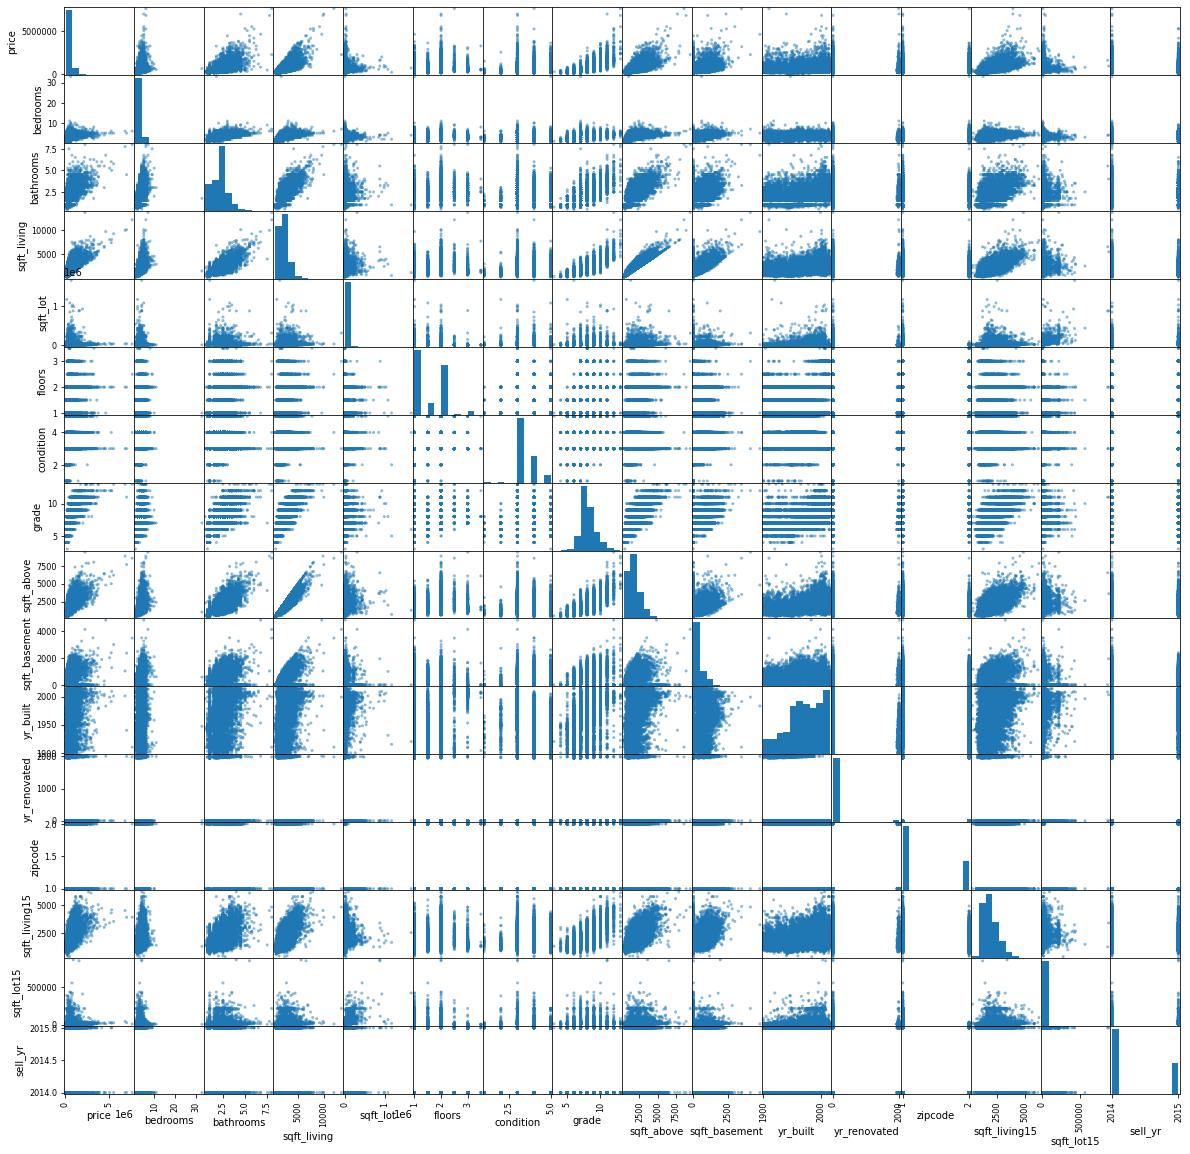

In [26]:
# let's check ALL the columns
# the_price = homes['price']
# homes.drop(columns='price', inplace=True)
data_pred = homes.iloc[:,1:24]

pd.plotting.scatter_matrix(data_pred,figsize  = [20, 20]);
plt.show()

# make a correlation matrix (heat map)

lets make a correlation matrix of the data to see which variables might have more potential correlation

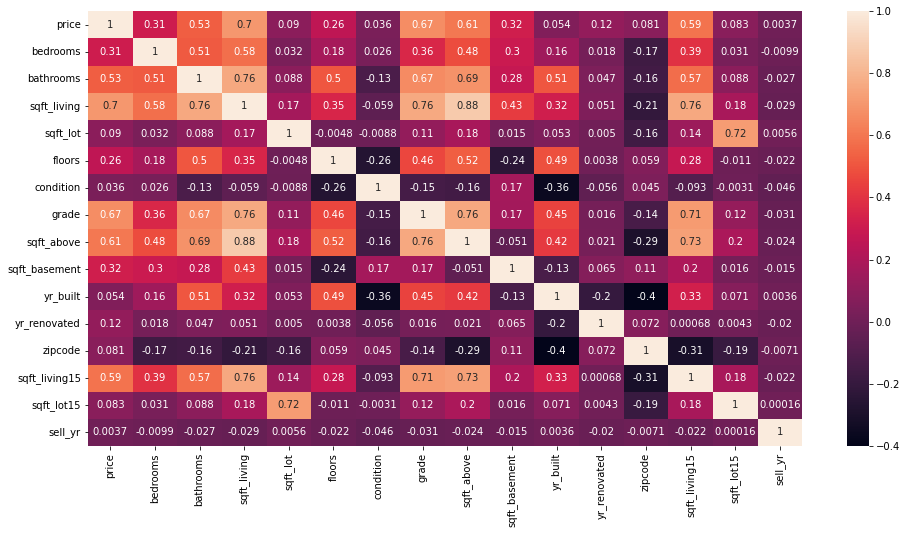

In [27]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.heatmap(homes.corr(), annot=True)
plt.show()

# the square feet above variable seems to be valuable

let's make a formula of X and Y being `sqft_above`, and `price`

In [28]:
# the formula
form = 'price~sqft_above'

#the model
pri_sqft_model = ols(formula=form, data=homes).fit()

In [29]:
# check the summery
pri_sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:35:53   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### the R squared value is weak. how can we improve this model?
there is a low P value, so there is some significance, but the R squared value tells me that the model isn't good enough to account for more than 36% of the data

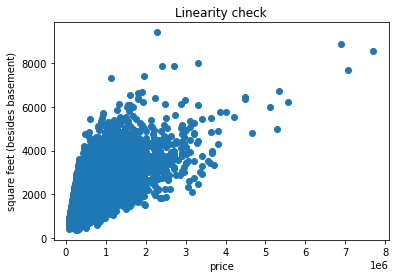

In [30]:
# scatter plot to check for linearity
plt.scatter(homes['price'], homes['sqft_above'])
plt.title("Linearity check")
plt.xlabel('price')
plt.ylabel('square feet (besides basement)')
plt.show()

## not linear :-<

let's check for normality and homoscedasticity

<AxesSubplot:>

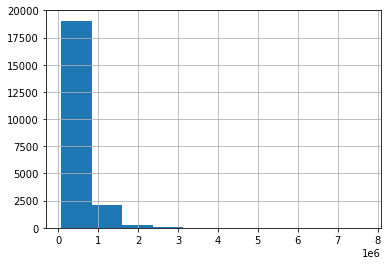

In [31]:
homes['price'].hist()

#### not normal. but what if we chop off the outliers?

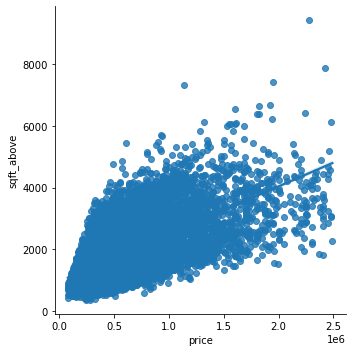

In [96]:
sns.lmplot(x='price', y='sqft_above', data=no_outliers)

<AxesSubplot:>

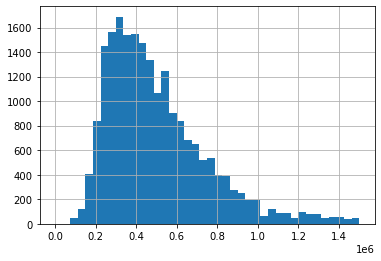

In [33]:
homes['price'].hist(range=(0, 1500000), bins=40)

<AxesSubplot:>

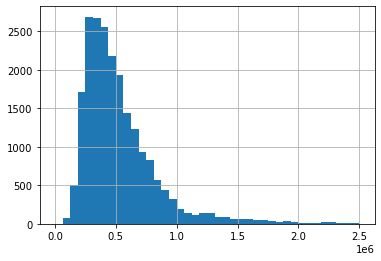

In [32]:
homes['price'].hist(range=(0, 2500000), bins=40)

***slightly*** more normal

there appears to be a few outliers, that are making our model less normal.

2.5M seems like an okay cuttoff

let's cut off the outliers and make a new DataFrame to use

In [34]:
no_outliers = homes.loc[homes['price'] < 2500000]

print(len(homes) - len(no_outliers))

102


102 out of 21,596 seems an okay amount to chop off

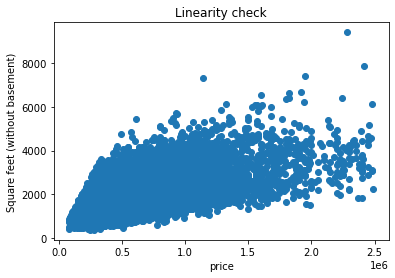

In [36]:
# let's re run the scatter plot without the outliers

plt.scatter(no_outliers['price'], no_outliers['sqft_above'])
plt.title("Linearity check")
plt.xlabel('price')
plt.ylabel('Square feet (without basement)')
plt.show()

### looks a bit better

let's check the DataFrame without the outliers to see if any variable has more of a linear relationship
another scatter matrix, and heatmap

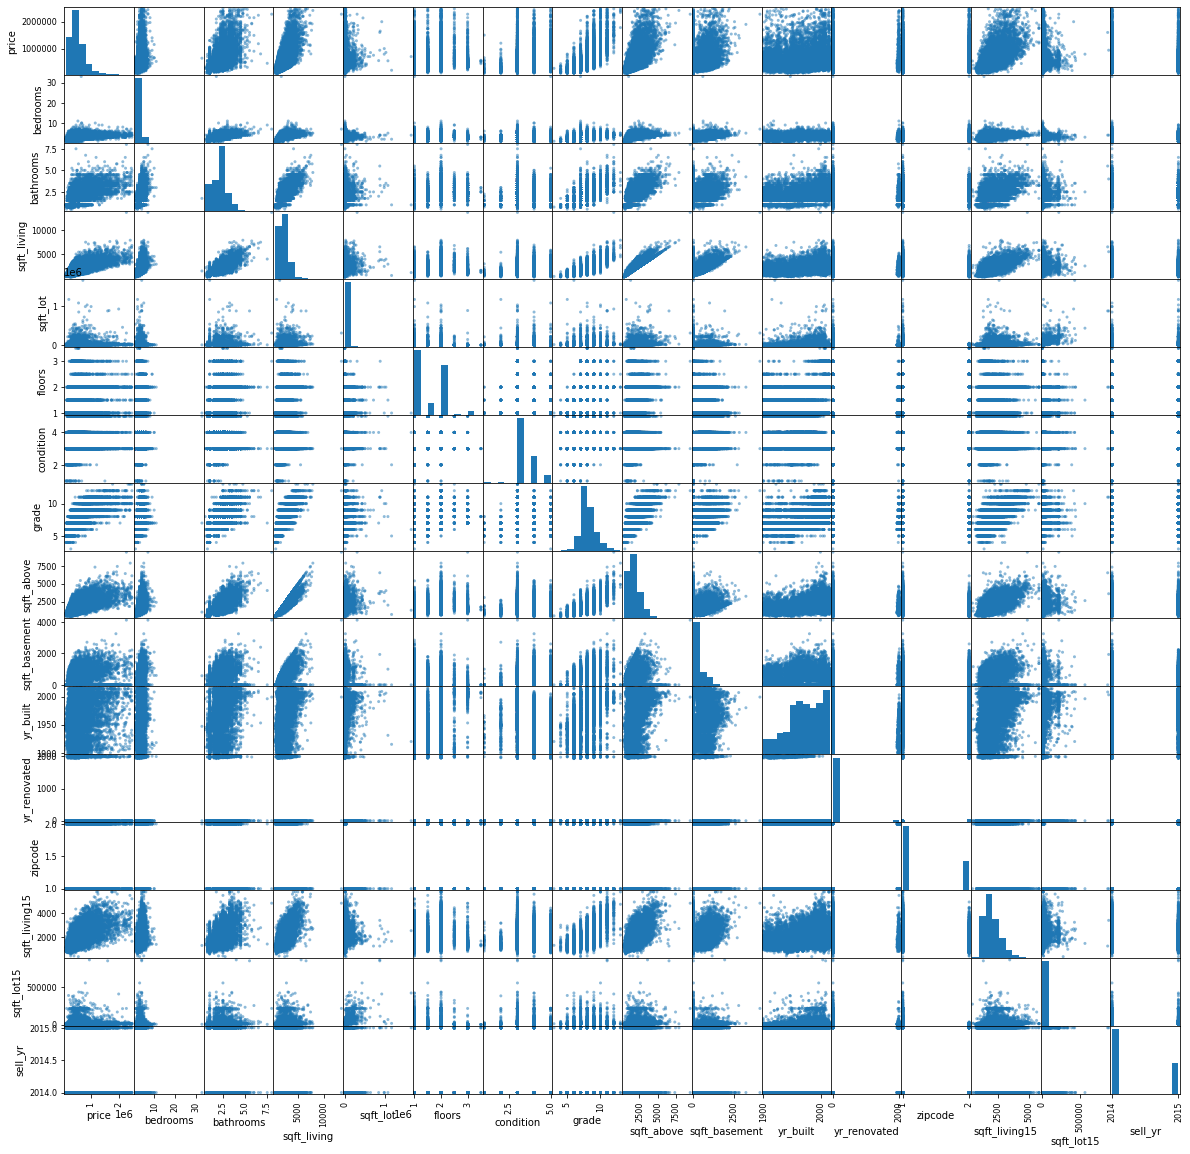

In [37]:
pd.plotting.scatter_matrix(no_outliers,figsize  = [20, 20]);
plt.show()

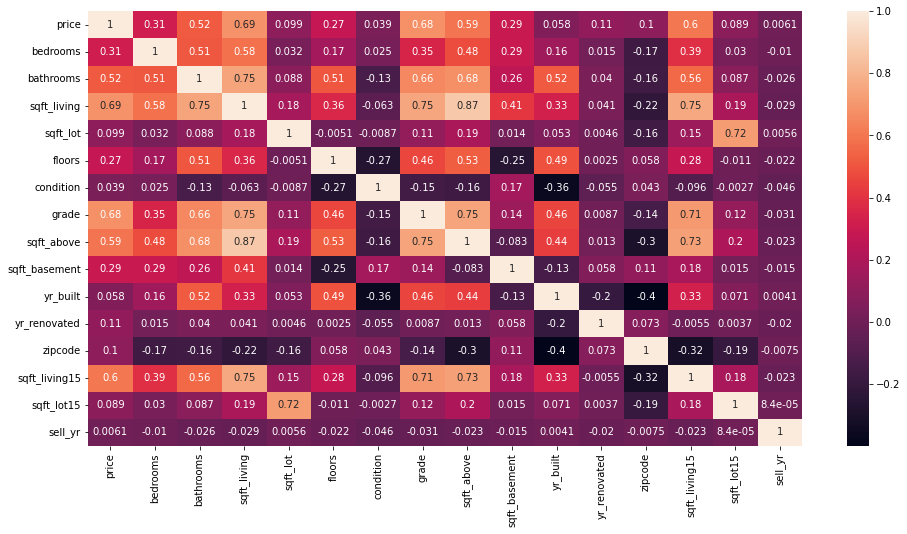

In [38]:
plt.figure(figsize=(16, 8))
sns.heatmap(no_outliers.corr(), annot=True)
plt.show()

#### let's try it again with something more homoscedastic

lets try a model with `yr_built` even though it's semi categorical

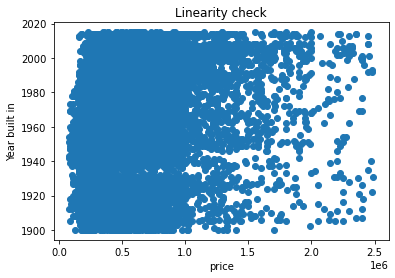

In [39]:
plt.scatter(no_outliers['price'], no_outliers['yr_built'])
plt.title("Linearity check")
plt.xlabel('price')
plt.ylabel('Year built in')
plt.show()

In [40]:
formula_1 = 'price~yr_built'

model_1 = ols(formula=formula_1, data=homes).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           2.12e-15
Time:                        12:36:17   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.896e+05   1.68e+05     -4.714      0.000   -1.12e+06   -4.61e+05
yr_built     674.7431     84.979      7.940      0.000     508.178     841.308
==============================================================================
Omnibus:                    19135.901   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142512.023
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      37.708   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## .03 R squared value

this model is worse. let's go back to `square feet`

Square feet of living space is the highest corellating factor to price, followed by square feet besides the basement, and amount of bathrooms.

the amount of bathrooms may be an effect of having more square feet. if it's an effect of multicolinearity, we will have to remove it

just for kicks, let's try bedrooms, even though it's categorical

In [41]:
formula_1_5 = 'price~bedrooms'

model_1_5 = ols(formula=formula_1_5, data=homes).fit()

model_1_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:36:17   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 0.09 R squared

not much better

## let's try first again, but without the outliers

In [42]:
form = 'price~sqft_above'

price_sqft_model = ols(formula=form, data=no_outliers).fit()

In [43]:
price_sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:36:17   Log-Likelihood:            -2.9766e+05
No. Observations:               21495   AIC:                         5.953e+05
Df Residuals:                   21493   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.22e+05   4129.475     29.536      0.000    1.14e+05     1.3e+05
sqft_above   228.2320      2.117    107.795      0.000     224.082     232.382
==============================================================================
Omnibus:                     8227.610   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44336.867
Skew:                           1.771   Prob(JB):                         0.00
Kurtosis:                       9.079   Cond. No.                     4.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R squared still sucks. 

this model only accounts for 35% of the data, worse than 36, but not that bad

let's move on to multi linear regression

## first, label encoding categorical variables

going to label encode the columns in place, not OHE. the below code is based on examples that Morgan gave me

In [44]:
from sklearn.preprocessing import LabelEncoder
laibel = LabelEncoder()

no_outliers['zipcode'] = laibel.fit_transform(no_outliers['zipcode'])
no_outliers['view'] = laibel.fit_transform(no_outliers['view'])
no_outliers['condition'] = laibel.fit_transform(no_outliers['condition'])
no_outliers['bathrooms'] = laibel.fit_transform(no_outliers['bathrooms'])
no_outliers['bedrooms'] = laibel.fit_transform(no_outliers['bedrooms'])
no_outliers['floors'] = laibel.fit_transform(no_outliers['floors'])
no_outliers['waterfront'] = laibel.fit_transform(no_outliers['waterfront'])

C:\Users\yonic\AppData\Local\Temp/ipykernel_19380/1652757702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers['zipcode'] = laibel.fit_transform(no_outliers['zipcode'])
C:\Users\yonic\AppData\Local\Temp/ipykernel_19380/1652757702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers['view'] = laibel.fit_transform(no_outliers['view'])
C:\Users\yonic\AppData\Local\Temp/ipykernel_19380/1652757702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [45]:
no_outliers.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sell_yr
15279,2014-05-06,78000.0,1,2,780,16344,0,0,4,0,5,780,0.0,1942,0,0,1700,10387,2014
465,2014-05-23,80000.0,0,1,430,5050,0,0,4,1,4,430,0.0,1912,0,0,1200,7500,2014
16184,2015-03-24,81000.0,1,2,730,9975,0,0,4,0,5,730,0.0,1943,0,0,860,9000,2015
8267,2014-11-05,82000.0,2,2,860,10426,0,0,4,2,6,860,0.0,1954,0,0,1140,11250,2014
2139,2014-05-08,82500.0,1,2,520,22334,0,0,4,1,5,520,0.0,1951,0,0,1572,10570,2014


# drop columns i don't intend to use

In [46]:
# i don't need date

no_outliers.drop(['date'], axis=1, inplace=True)

C:\Users\yonic\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
y_var = 'price'
x_vars = no_outliers.drop('price', axis=1)
all_columns = '+'.join(x_vars.columns)
multi_formula_1 = y_var + '~' + all_columns

In [48]:
model_ver_1 = ols(formula=multi_formula_1, data=no_outliers).fit()
model_ver_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2591.
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:36:17   Log-Likelihood:            -2.9031e+05
No. Observations:               21495   AIC:                         5.807e+05
Df Residuals:                   21477   BIC:                         5.808e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.822e+07   5.24e+06     -9.211      0.000   -5.85e+07    -3.8e+07
bedrooms      -2.253e+04   1759.708    -12.806      0.000    -2.6e+04   -1.91e+04
bathrooms      8283.5500    728.844     11.365      0.000    6854.961    9712.139
sqft_living      68.8539     16.404      4.197      0.000      36.700     101.008
sqft_lot          0.1588      0.042      3.763      0.000       0.076       0.242
floors        -2336.9917   1685.979     -1.386      0.166   -5641.636     967.653
waterfront     4.481e+05   1.71e+04     26.166      0.000    4.15e+05    4.82e+05
view          -1.951e+04   1432.501    -13.619      0.000   -2.23e+04   -1.67e+04
condition      3.244e+04   2070.360     15.666      0.000    2.84e+04    3.65e+04
grade          1.051e+05   1905.543     55.130      0.000    1.01e+05    1.09e+05
sqft_above       58.1059     16.384      3.546      0.000      25.992      90.220
sqft_basement    41.0374     16.240      2.527      0.012       9.206      72.868
yr_built      -2167.3545     65.829    -32.924      0.000   -2296.384   -2038.325
yr_renovated     27.5208      3.542      7.770      0.000      20.579      34.463
zipcode        1.354e+05   3420.583     39.590      0.000    1.29e+05    1.42e+05
sqft_living15    75.8893      3.060     24.799      0.000      69.891      81.887
sqft_lot15       -0.3239      0.065     -5.013      0.000      -0.450      -0.197
sell_yr         2.57e+04   2598.198      9.890      0.000    2.06e+04    3.08e+04
==============================================================================
Omnibus:                     7886.031   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60448.929
Skew:                           1.563   Prob(JB):                         0.00
Kurtosis:                      10.598   Cond. No.                     2.19e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### floors has a high P value, dropping it

In [49]:
no_outliers.drop(['floors'], axis=1, inplace=True)

C:\Users\yonic\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
model_ver_1.fvalue

2590.9157509984348

In [51]:
# change pandas options, because i want to see all rows in Jupyter

pd.set_option('display.max_rows', None)

model_ver_1.params

Intercept       -4.821817e+07
bedrooms        -2.253408e+04
bathrooms        8.283550e+03
sqft_living      6.885388e+01
sqft_lot         1.588160e-01
floors          -2.336992e+03
waterfront       4.481380e+05
view            -1.950852e+04
condition        3.243519e+04
grade            1.050534e+05
sqft_above       5.810591e+01
sqft_basement    4.103740e+01
yr_built        -2.167354e+03
yr_renovated     2.752076e+01
zipcode          1.354211e+05
sqft_living15    7.588927e+01
sqft_lot15      -3.238597e-01
sell_yr          2.569594e+04
dtype: float64

## bathrooms... again 

this model acounts for %67 percent of the data though

maybe i should do some log transformations 

In [52]:
pd.set_option('display.max_rows', 10)

In [53]:
# get MAE to see how much error is in our model
y_predic = model_ver_1.resid
y = homes['price']
mae_resid = np.mean(np.abs(y - y_predic))
mae_resid

527593.3378216053

In [54]:
# and RMSE because i intend to make another model, since at least one variable has a P value that is too high
# and several coeficients are very negative 

model_ver_1.mse_resid

31562880473.717342

In [55]:
rmse_residuals = np.sqrt(model_ver_1.mse_resid)
rmse_residuals

177659.4508426651

In [56]:
print(rmse_residuals - mae_resid)

-349933.88697894017


In [57]:
resids = model_ver_1.resid

C:\Users\yonic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

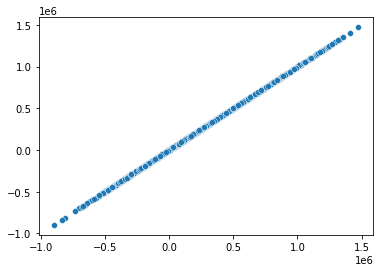

In [58]:
sns.scatterplot(y_predic,resids)

C:\Users\yonic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

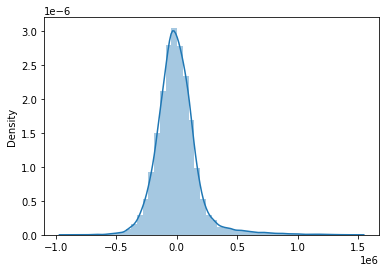

In [59]:
sns.distplot(resids,kde=True)

C:\Users\yonic\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\yonic\AppData\Local\Temp/ipykernel_19380/1338386054.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


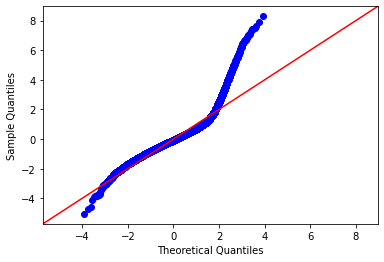

In [60]:
from scipy import stats

fig = sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
fig.show()

## check for autocorrelation

using a method i got from Morgan

In [62]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids)

1.2287245187475024

# log transformations and scaling

everything looks pretty normal. not sure if log transformations are neccessary. feature sczaling is though, most of the variables with high coeficients have a vastly different scale from our dedpendent variable

In [63]:
from sklearn import preprocessing

standard_vars = preprocessing.StandardScaler().fit_transform(no_outliers)

# [['yr_built', 'yr_renovated','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']]

# homes_2 = no_outliers.copy()
# homes_2 = homes_2.drop(['yr_built', 'yr_renovated','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15'], axis=1)

homes_2 = pd.DataFrame(standard_vars, columns=no_outliers.columns)

# homes_2.head(10)

### let's make a new model with the scaled variables

In [64]:

x_vars = homes_2.drop('price', axis=1)
# all_columns = '+'.join(x_vars.columns)
# formula_2 = y_var + '~' + all_columns
# multi_formula_1 = y_var + '~' + all_columns
x_vars_int2 = sm.add_constant(x_vars)
model_ver_2 = sms.OLS(homes_2['price'], x_vars_int2).fit()
model_ver_2.summary()

C:\Users\yonic\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2753.
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:36:18   Log-Likelihood:                -18513.
No. Observations:               21495   AIC:                         3.706e+04
Df Residuals:                   21478   BIC:                         3.720e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.882e-15      0.004  -2.27e-12      1.000      -0.008       0.008
bedrooms         -0.0655      0.005    -12.799      0.000      -0.076      -0.055
bathrooms         0.0782      0.007     11.357      0.000       0.065       0.092
sqft_living       0.2004      0.047      4.307      0.000       0.109       0.292
sqft_lot          0.0214      0.006      3.795      0.000       0.010       0.032
waterfront        0.1047      0.004     26.132      0.000       0.097       0.113
view             -0.0572      0.004    -13.599      0.000      -0.065      -0.049
condition         0.0682      0.004     15.738      0.000       0.060       0.077
grade             0.3891      0.007     55.122      0.000       0.375       0.403
sqft_above        0.1442      0.042      3.413      0.001       0.061       0.227
sqft_basement     0.0573      0.023      2.531      0.011       0.013       0.102
yr_built         -0.2076      0.006    -34.843      0.000      -0.219      -0.196
yr_renovated      0.0318      0.004      7.705      0.000       0.024       0.040
zipcode           0.1996      0.005     42.027      0.000       0.190       0.209
sqft_living15     0.1658      0.007     24.945      0.000       0.153       0.179
sqft_lot15       -0.0283      0.006     -4.976      0.000      -0.039      -0.017
sell_yr           0.0388      0.004      9.916      0.000       0.031       0.047
==============================================================================
Omnibus:                     7905.697   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60813.334
Skew:                           1.566   Prob(JB):                         0.00
Kurtosis:                      10.622   Cond. No.                         37.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### coeficients are scaled, a bit better R squared, and better for prediction with test-train ing



## MUCH better
the `model_ver_2` model accounts for 67% of the data. not perfect, but good enough to progress

let's try going back to our earlier model, but without the *floors* variable

In [65]:
two_point_one = no_outliers.drop('price', axis=1)

model_ver_2_1 = sms.OLS(no_outliers['price'], two_point_one).fit()
model_ver_2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          1.453e+04
Date:                Sun, 10 Jul 2022   Prob (F-statistic):                        0.00
Time:                        12:36:18   Log-Likelihood:                     -2.9036e+05
No. Observations:               21495   AIC:                                  5.807e+05
Df Residuals:                   21479   BIC:                                  5.809e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.237e+04   1763.088    -12.687      0.000   -2.58e+04   -1.89e+04
bathrooms      8055.5795    709.831     11.349      0.000    6664.259    9446.900
sqft_living      70.0273     16.395      4.271      0.000      37.892     102.162
sqft_lot          0.1633      0.042      3.862      0.000       0.080       0.246
waterfront      4.47e+05   1.71e+04     26.069      0.000    4.13e+05    4.81e+05
view          -1.973e+04   1434.930    -13.747      0.000   -2.25e+04   -1.69e+04
condition      3.142e+04   2068.987     15.188      0.000    2.74e+04    3.55e+04
grade          1.047e+05   1907.354     54.918      0.000    1.01e+05    1.08e+05
sqft_above       55.7985     16.314      3.420      0.001      23.822      87.775
sqft_basement    41.2979     16.272      2.538      0.011       9.404      73.192
yr_built      -2207.4021     63.074    -34.997      0.000   -2331.032   -2083.773
yr_renovated     26.3400      3.542      7.437      0.000      19.398      33.283
zipcode        1.331e+05   3186.401     41.775      0.000    1.27e+05    1.39e+05
sqft_living15    76.0089      3.059     24.844      0.000      70.012      82.006
sqft_lot15       -0.3232      0.065     -4.995      0.000      -0.450      -0.196
sell_yr        1800.6760     61.000     29.519      0.000    1681.111    1920.241
==============================================================================
Omnibus:                     7933.250   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60773.471
Skew:                           1.574   Prob(JB):                         0.00
Kurtosis:                      10.612   Cond. No.                     7.15e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 91!!! that's crazy!!!

how did i get such a high R squared value?!?!

this isn't possible

let's stick with the scaled model above

In [66]:
homes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21495 entries, 0 to 21494
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21495 non-null  float64
 1   bedrooms       21495 non-null  float64
 2   bathrooms      21495 non-null  float64
 3   sqft_living    21495 non-null  float64
 4   sqft_lot       21495 non-null  float64
 5   waterfront     21495 non-null  float64
 6   view           21495 non-null  float64
 7   condition      21495 non-null  float64
 8   grade          21495 non-null  float64
 9   sqft_above     21495 non-null  float64
 10  sqft_basement  21495 non-null  float64
 11  yr_built       21495 non-null  float64
 12  yr_renovated   21495 non-null  float64
 13  zipcode        21495 non-null  float64
 14  sqft_living15  21495 non-null  float64
 15  sqft_lot15     21495 non-null  float64
 16  sell_yr        21495 non-null  float64
dtypes: float64(17)
memory usage: 2.8 MB


In [67]:
#using scikit learn now for the 'split_train_test' function

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
predictors = homes_2.drop('price', axis=1)
y = homes_2['price']
linreg.fit(predictors, y)
linreg.coef_

array([-0.06553334,  0.07822754,  0.20041315,  0.02141826,  0.10472649,
       -0.05717552,  0.06824234,  0.38911295,  0.14423154,  0.05725909,
       -0.20760062,  0.0317571 ,  0.19959298,  0.16579436, -0.0283043 ,
        0.03883301])

In [68]:
# and the intercept
linreg.intercept_

-8.41406234344159e-15

## that's pretty low

let's drop variables that have decreasing coeficients, and see what our R squared value is

In [108]:
predictors2 = homes_2.drop(columns=['view','yr_built','sqft_lot15'])
model_ver_3 = sms.OLS(y, predictors2).fit()
model_ver_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.311e+32
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:48:01   Log-Likelihood:                      6.8547e+05
No. Observations:               21495   AIC:                                 -1.371e+06
Df Residuals:                   21481   BIC:                                 -1.371e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
price             1.0000   3.94e-17   2.54e+16      0.000       1.000       1.000
bedrooms      -4.406e-16   3.04e-17    -14.477      0.000      -5e-16   -3.81e-16
bathrooms     -6.349e-16    3.7e-17    -17.167      0.000   -7.07e-16   -5.62e-16
sqft_living   -1.735e-16   2.78e-16     -0.625      0.532   -7.18e-16    3.71e-16
sqft_lot      -3.886e-16   2.41e-17    -16.109      0.000   -4.36e-16   -3.41e-16
waterfront    -1.023e-16    2.4e-17     -4.267      0.000   -1.49e-16   -5.53e-17
condition      2.637e-16   2.48e-17     10.615      0.000    2.15e-16    3.12e-16
grade         -9.021e-16   4.28e-17    -21.069      0.000   -9.86e-16   -8.18e-16
sqft_above    -1.193e-15   2.52e-16     -4.732      0.000   -1.69e-15   -6.99e-16
sqft_basement -4.163e-17   1.35e-16     -0.308      0.758   -3.07e-16    2.23e-16
yr_renovated   1.699e-16   2.38e-17      7.143      0.000    1.23e-16    2.17e-16
zipcode        4.441e-16    2.8e-17     15.888      0.000    3.89e-16    4.99e-16
sqft_living15  -2.22e-16      4e-17     -5.553      0.000      -3e-16   -1.44e-16
sell_yr       -3.036e-17   2.35e-17     -1.294      0.196   -7.63e-17    1.56e-17
==============================================================================
Omnibus:                     2608.883   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4122.459
Skew:                           0.865   Prob(JB):                         0.00
Kurtosis:                       4.270   Cond. No.                         37.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

when i drop some variables with negative coeficients, others that were positive, are now negative

and the R squared value is perfect, an impossibility.

i will go back to using the second model

for kicks, let's just drop `bathrooms` and see what we get

In [102]:
predictors2_5 = homes_2.drop(columns=['bathrooms', 'sell_yr', 'yr_renovated', 'sqft_above', 'sqft_living15', 'sqft_lot15'])
model_ver_3_5 = sms.OLS(y, predictors2_5).fit()
model_ver_3_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.705e+32
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:35:48   Log-Likelihood:                      6.9661e+05
No. Observations:               21495   AIC:                                 -1.393e+06
Df Residuals:                   21484   BIC:                                 -1.393e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
price             1.0000   2.38e-17   4.21e+16      0.000       1.000       1.000
bedrooms       7.529e-16   1.78e-17     42.241      0.000    7.18e-16    7.88e-16
sqft_living    2.741e-16   3.05e-17      9.000      0.000    2.14e-16    3.34e-16
sqft_lot      -1.384e-15   1.44e-17    -96.355      0.000   -1.41e-15   -1.36e-15
waterfront     6.609e-16   1.45e-17     45.724      0.000    6.33e-16    6.89e-16
view          -1.978e-16   1.49e-17    -13.239      0.000   -2.27e-16   -1.68e-16
condition      4.337e-16   1.52e-17     28.446      0.000    4.04e-16    4.64e-16
grade         -2.082e-16   2.61e-17     -7.977      0.000   -2.59e-16   -1.57e-16
sqft_basement  4.471e-16   1.69e-17     26.445      0.000    4.14e-16     4.8e-16
yr_built       5.065e-16    1.9e-17     26.692      0.000    4.69e-16    5.44e-16
zipcode        -5.69e-16   1.66e-17    -34.320      0.000   -6.01e-16   -5.36e-16
==============================================================================
Omnibus:                    19147.112   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3497177.972
Skew:                           3.652   Prob(JB):                         0.00
Kurtosis:                      65.060   Cond. No.                         4.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Great P values on everything, but R squared is still too perfect

In [103]:
model_ver_3_5.mse_resid

4.152850300050715e-30

# fit and transform? let's go! (and make test and train data sets)


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()


i will use the train and test data to gradually add features to the base model to see if any improvement has occured

In [71]:
f_t_pred = sc.fit_transform(predictors)
X_train, X_test, y_train, y_test = train_test_split(f_t_pred, y,random_state = 0,test_size=0.20)

### get R squared score of training data

In [72]:
from sklearn.metrics import r2_score


split_regr = LinearRegression().fit(X_train,y_train)
y_split_pred = split_regr.predict(X_train)
r2_score(y_true=y_train,y_pred=y_split_pred)


0.6783062656137873

### this model is okay

get y hat value to get the Mean Squared Error

In [73]:
from sklearn.metrics import mean_squared_error

# function to get mse of model

def get_mse(X_t, X_te, y_t, y_te):
    split_regr = LinearRegression().fit(X_t,y_t)
    y_hat_train = split_regr.predict(X_t)
    y_hat_test = split_regr.predict(X_te)

    train_mse = mean_squared_error(y_t, y_hat_train)
    test_mse = mean_squared_error(y_te, y_hat_test)
    print('train ',train_mse, ' test ', test_mse)
get_mse(X_train, X_test, y_train, y_test)

train  0.3216357626419723  test  0.3530645872380415


# check for multicolinearity, and homoscedacity


make sure the R squared values are good, and continually check if the model we are using is producing better results than before

***BUT*** beware of over fitting, multicolinearity, confounding variables

## check for Homoscedasticity 
i hope...

C:\Users\yonic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


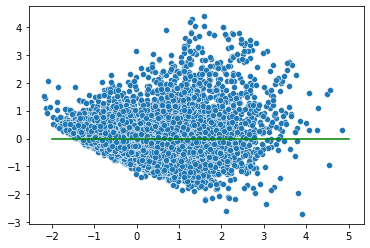

In [74]:
residuals = y_train.values-y_split_pred

mixplot = sns.scatterplot(x=y_split_pred,y=residuals)
mixplot = sns.lineplot([-2,5],[0,0],color='green')

nope...

but it still might be usable

### and normality

C:\Users\yonic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

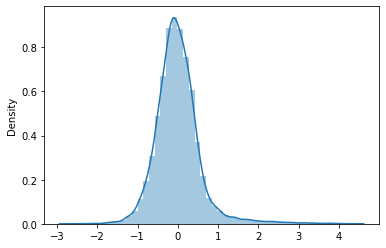

In [75]:
sns.distplot(residuals,kde=True)


not that bad

###  now to check for multicolinearity

<AxesSubplot:>

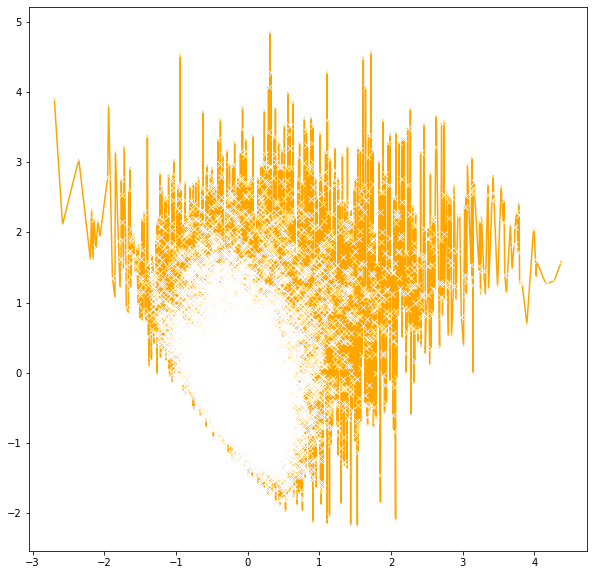

In [76]:
plt.figure(figsize=(10,10))
sns.lineplot(y=y_split_pred,x=residuals,marker='x',color='orange')

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [78]:
y_hat_train = split_regr.predict(X_train)
y_hat_test = split_regr.predict(X_test)

print('Training MAE', mean_absolute_error(y_train, y_hat_train))
print('Testing MAE', mean_absolute_error(y_test, y_hat_test))

Training MAE 0.3930329876078424
Testing MAE 0.40651816963354875


# describe what model is doing

does it answer our business question? how does it answer it?

it seems that the testing error is higher than the training error. this means that our model is useful.

the coeficients for `sqft_living` , `sqft_lot` and `grade` being the highest, i would recomend a potential investor looking for
a house in the seatle area that has a higher square footage of the lot and living room, if possible near the water.

for every increase in grade, a %39 increase in price
for every increase in square feet of living room, or general lot, a %20 increase each in price
if the house is on the waterfront, expect a %10 increase in price
and if the house is within the seatle area, expect a %20 increase in price
additionally, if neighboring houses have larger living rooms, you can expect a %17 increase in price

strangely, having more bathrooms consistently had correlation with a higher price. as a NYer, i am biased to think this is an important factor, but objectively, it is most probably due to larger, more expensive houses with more rooms, naturally having more bathrooms